In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
print(test_new.shape)  #ROWS, COLUMNS

(25000, 4223)


In [6]:
# making dateTime column as a index for the test_new panda dataframe
test_new = test_new.set_index('dateTime')

In [7]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
#                            ,'RWWIHOB_MWT0']#rmse error 1.99

# multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38

multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2',
                             'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94
size_column = len(multivariate_column_label)
print(size_column)

8


In [8]:
size_column = len(multivariate_column_label)
print(size_column)

8


In [9]:
multivariate_data=test_new.iloc[2000:10000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]

In [10]:
multivariate_data.head()

,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
dateTime,,,,,,,,
2019-04-01 10:41:00,100.0,97.700539,97.882738,40.370434,71.079345,94.396188,95.197505,79.651755
2019-04-01 10:42:00,100.0,97.602208,97.759636,40.216788,70.706495,94.318615,95.151028,77.686548
2019-04-01 10:43:00,100.0,97.434917,97.576584,39.823313,70.289996,94.031510,94.982774,76.496477
2019-04-01 10:44:00,100.0,96.856201,97.025646,39.922763,69.994697,94.286623,95.170256,76.661633
2019-04-01 10:45:00,100.0,96.748572,96.909181,39.771485,70.138749,94.273834,95.158246,76.051026


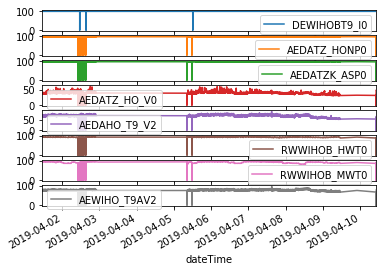

In [11]:
ax = multivariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
plt.show()

In [12]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  5


In [13]:
if zero_index.size > 0:
    multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    multivariate_data_modify = multivariate_data

In [14]:
print(multivariate_data.shape)
print(multivariate_data_modify.shape)

(8000, 8)
(7995, 8)


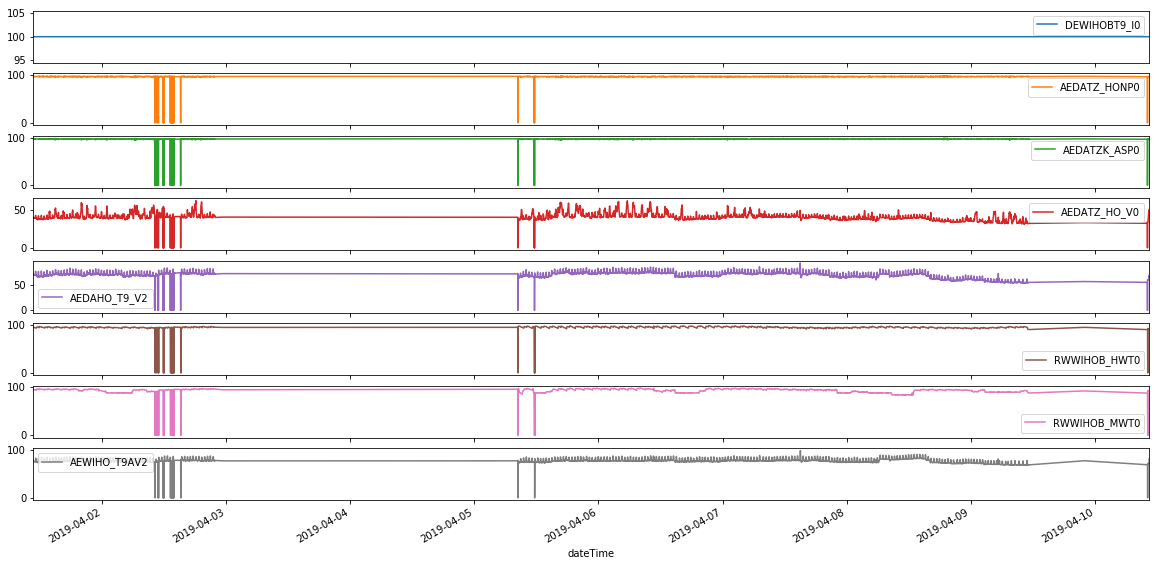

In [15]:
bx = multivariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.legend(loc='upper left')
plt.show()

In [16]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

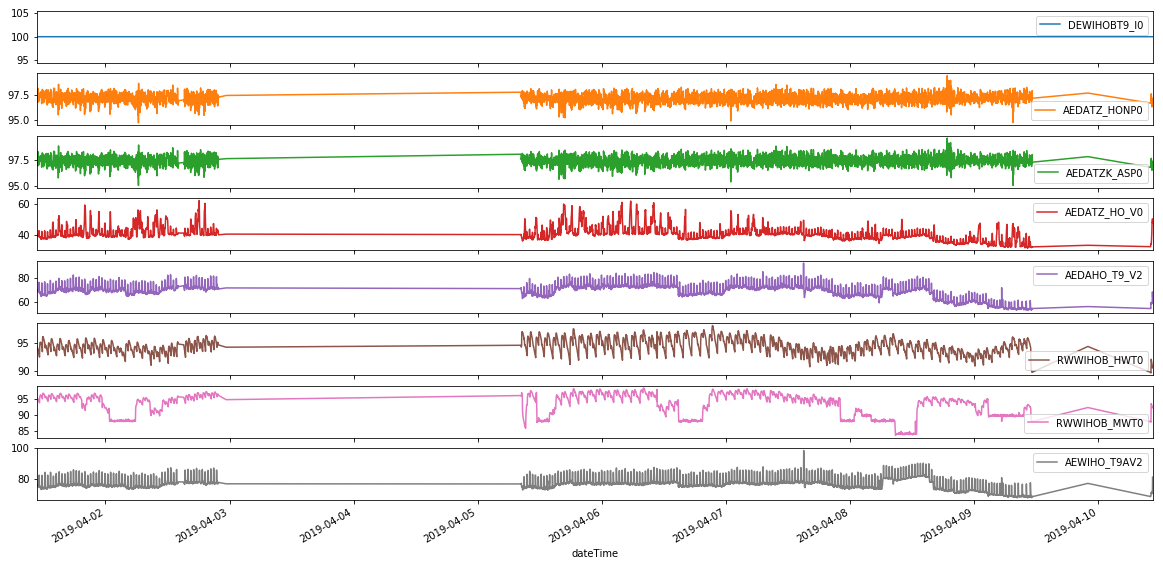

In [17]:
cx = multivariate_data_drop_zero.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [18]:
multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()

In [19]:
print(multivariate_data_drop_zero.shape)
print(multivariate_data_drop_zero_resample.shape)

(7937, 8)
(12951, 8)


In [20]:
multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')

In [21]:
print(multivariate_data_drop_zero_interpolate.shape)

(12951, 8)


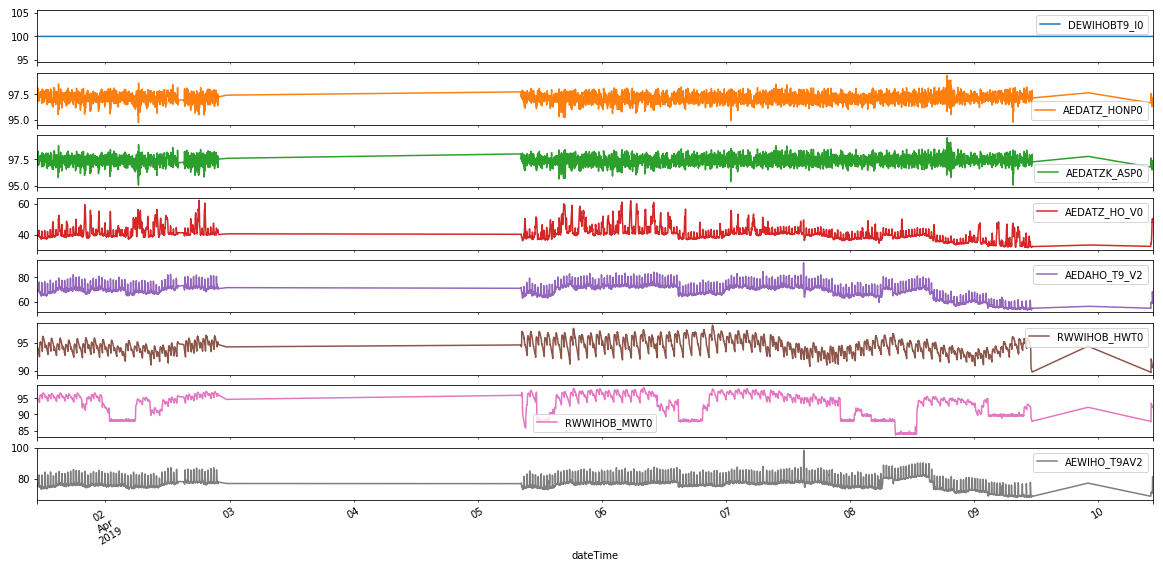

In [22]:
dx = multivariate_data_drop_zero_interpolate.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

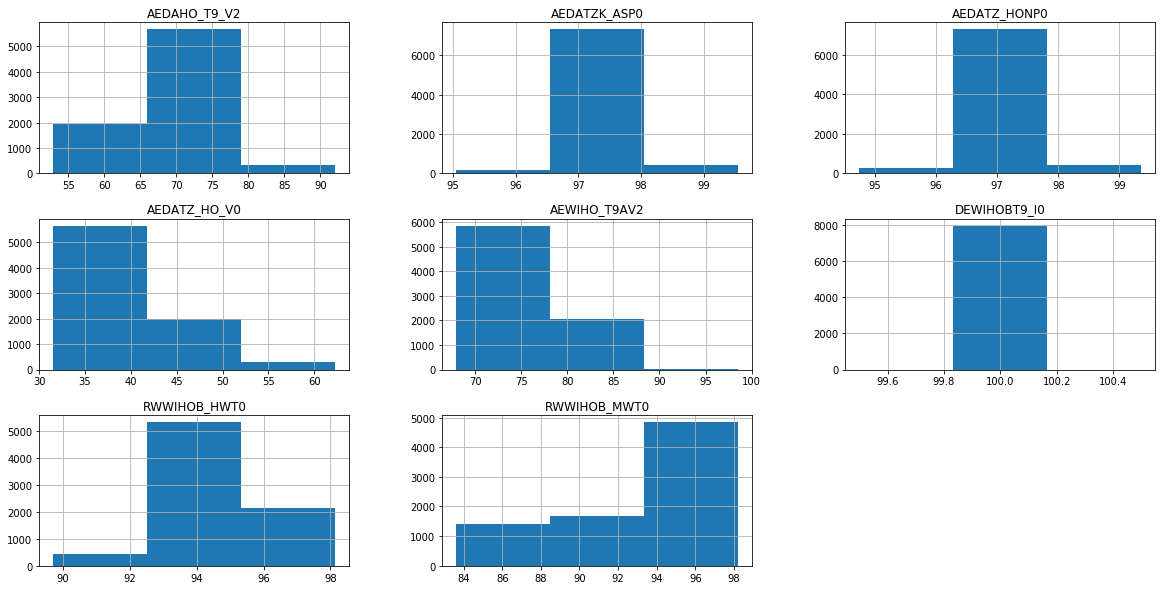

In [23]:
hist = multivariate_data_drop_zero.hist(bins=3)

In [24]:
# print(len(multivariate_column_label))
for idx, i in enumerate(multivariate_column_label):
    now_idx = idx+1
    
    if now_idx == len(multivariate_column_label):
        print('terminate')
        break
    print(multivariate_column_label[now_idx])
    drop_consecutive_same_value_zero = multivariate_data_drop_zero.loc[multivariate_data_drop_zero[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero[multivariate_column_label[now_idx]]]
    drop_consecutive_same_value_interpolate = multivariate_data_drop_zero_interpolate.loc[multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]]]
    


AEDATZ_HONP0
AEDATZK_ASP0
AEDATZ_HO_V0
AEDAHO_T9_V2
RWWIHOB_HWT0
RWWIHOB_MWT0
AEWIHO_T9AV2
terminate


In [25]:
print(multivariate_data_drop_zero.shape)
print(drop_consecutive_same_value_zero.shape)
print(drop_consecutive_same_value_interpolate.shape)

(7937, 8)
(7930, 8)
(12944, 8)


In [26]:
new_dataframe = drop_consecutive_same_value_zero.drop(['DEWIHOBT9_I0'], axis=1)
# new_dataframe = drop_consecutive_same_value_interpolate.drop(['DEWIHOBT9_I0'], axis=1)

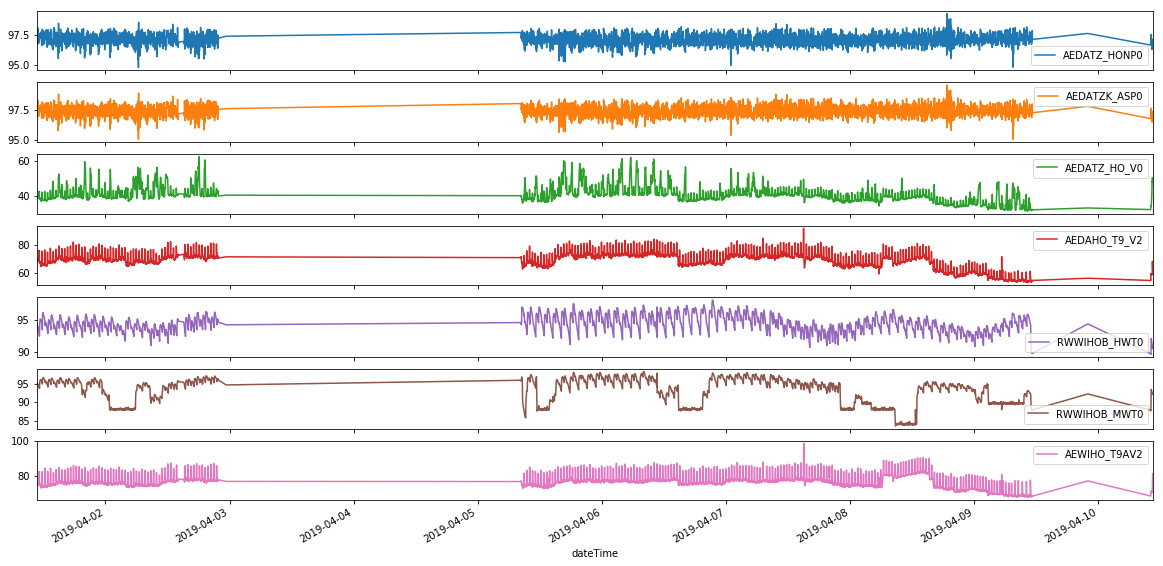

In [27]:
ex = new_dataframe.plot(subplots=True, layout=(size_column-1,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [28]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_modify: ', multivariate_data_modify.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)
print('shape of new_dataframe: ', new_dataframe.shape)

shape of multivariate_data:  (8000, 8)
shape of multivariate_data_modify:  (7995, 8)
shape of multivariate_data_drop_zero:  (7937, 8)
shape of new_dataframe:  (7930, 7)


In [29]:
multivariate_data_drop_zero.head()

,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
dateTime,,,,,,,,
2019-04-01 10:41:00,100.0,97.700539,97.882738,40.370434,71.079345,94.396188,95.197505,79.651755
2019-04-01 10:42:00,100.0,97.602208,97.759636,40.216788,70.706495,94.318615,95.151028,77.686548
2019-04-01 10:43:00,100.0,97.434917,97.576584,39.823313,70.289996,94.031510,94.982774,76.496477
2019-04-01 10:44:00,100.0,96.856201,97.025646,39.922763,69.994697,94.286623,95.170256,76.661633
2019-04-01 10:45:00,100.0,96.748572,96.909181,39.771485,70.138749,94.273834,95.158246,76.051026


In [30]:
new_dataframe.corr()

,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
AEDATZ_HONP0,1.000000,0.986607,-0.375157,-0.161240,-0.052884,-0.066476,-0.042117
AEDATZK_ASP0,0.986607,1.000000,-0.303132,-0.108016,-0.045979,-0.045416,0.018198
AEDATZ_HO_V0,-0.375157,-0.303132,1.000000,0.612193,0.142894,0.269080,0.395302
AEDAHO_T9_V2,-0.161240,-0.108016,0.612193,1.000000,0.149537,0.359298,0.768550
RWWIHOB_HWT0,-0.052884,-0.045979,0.142894,0.149537,1.000000,0.246607,-0.005621
RWWIHOB_MWT0,-0.066476,-0.045416,0.269080,0.359298,0.246607,1.000000,0.104084
AEWIHO_T9AV2,-0.042117,0.018198,0.395302,0.768550,-0.005621,0.104084,1.000000


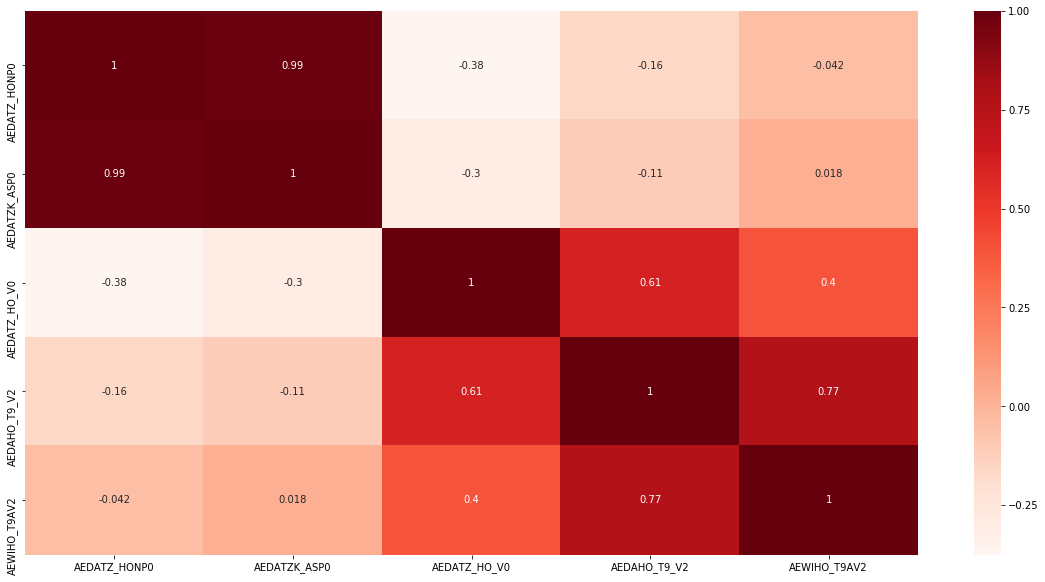

In [64]:
#Using Pearson Correlation
import seaborn as sns
plt.figure(figsize=(20,10))
# cor = multivariate_data_mean.corr()
cor = new_dataframe_1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [31]:
new_dataframe_1 = new_dataframe.drop(['RWWIHOB_HWT0','RWWIHOB_MWT0'], axis=1)

In [32]:
# print('multivariate_data_drop_zero head: \n',multivariate_data_drop_zero.head())
dataset=np.array(new_dataframe_1)

In [33]:
NumberOfElements=int(len(dataset)*0.9)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

train_input=dataset[0:NumberOfElements,0:-1]
print('train_input shape: ',train_input.shape)
train_output=dataset[0:NumberOfElements,-1]
print('train_output shape: ',train_output.shape)

test_input=dataset[NumberOfElements:len(dataset),0:-1]
print('test_input shape: ',test_input.shape)
test_output=dataset[NumberOfElements:len(dataset),-1]
print('test_output shape: ',test_output.shape)
# print('train data size: ',train_data.shape,'\ntest data size: ',test_data.shape)

Number of Elements for training:  7137
dataset length:  7930
train_input shape:  (7137, 4)
train_output shape:  (7137,)
test_input shape:  (793, 4)
test_output shape:  (793,)


# Support Regression

In [34]:
import seaborn as sn
from sklearn import svm
# from sklearn import preprocessing, cross_validation, neighbors, svm
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV

In [35]:
SVR_regression = svm.SVR()
SVR_regression.fit(train_input, train_output)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
predicted_output = SVR_regression.predict(test_input)

In [37]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
# print('Slope:' ,SVR_regression.coef_)
print('Intercept:', SVR_regression.intercept_)
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

Intercept: [77.7374711]
r_2 statistic: -3.30
Mean_absolute_error: 4.76
Mean squared error: 32.12
RMSE:  5.6674578014370125


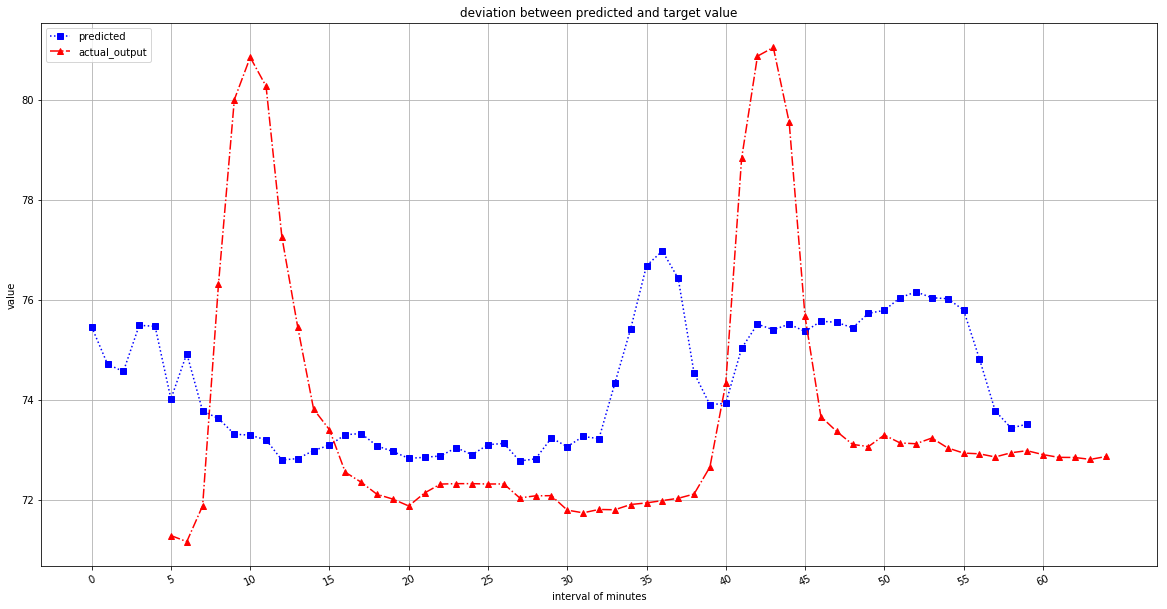

In [38]:
actual_data = range(65)


plt.plot(predicted_output[:60],color='blue',marker='s', linestyle=':')
plt.plot(actual_data[5:], test_output[:60],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('interval of minutes')
plt.legend(['predicted','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,65,5))
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

<class 'numpy.ndarray'>


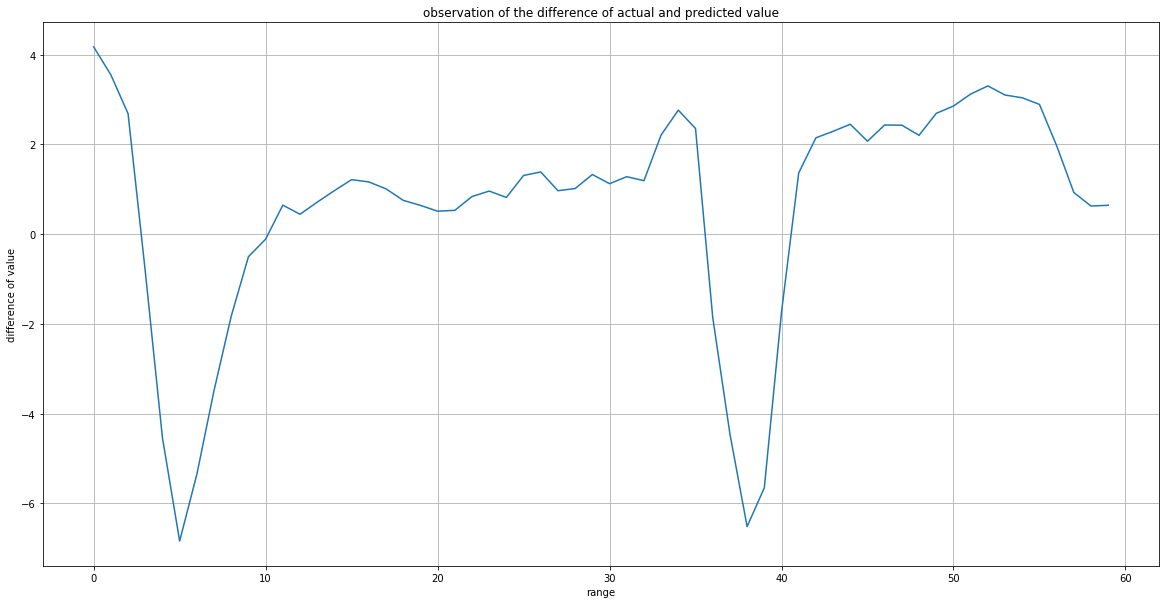

In [39]:
# try to draw a graph where I will plot only the differences between actual and predicted value.
# %matplotlib qt

difference_of_value = predicted_output - test_output
print(type(difference_of_value))

plt.plot(difference_of_value[0:60])
plt.title('observation of the difference of actual and predicted value')

# plt.rcParams['xtick.labelsize']=2
# plt.rcParams['ytick.labelsize']=2
# plt.tick_params(labelsize=20)
plt.ylabel('difference of value')
plt.xlabel('range')
plt.grid(b=None, which='both', axis='both')
# plt.savefig('difference_of_actual_and_predicted_value.png')
plt.show()

min : 67.94608028186737  and max:  81.38228262237322
min : 71.2518451300356  and max:  77.73747109704763


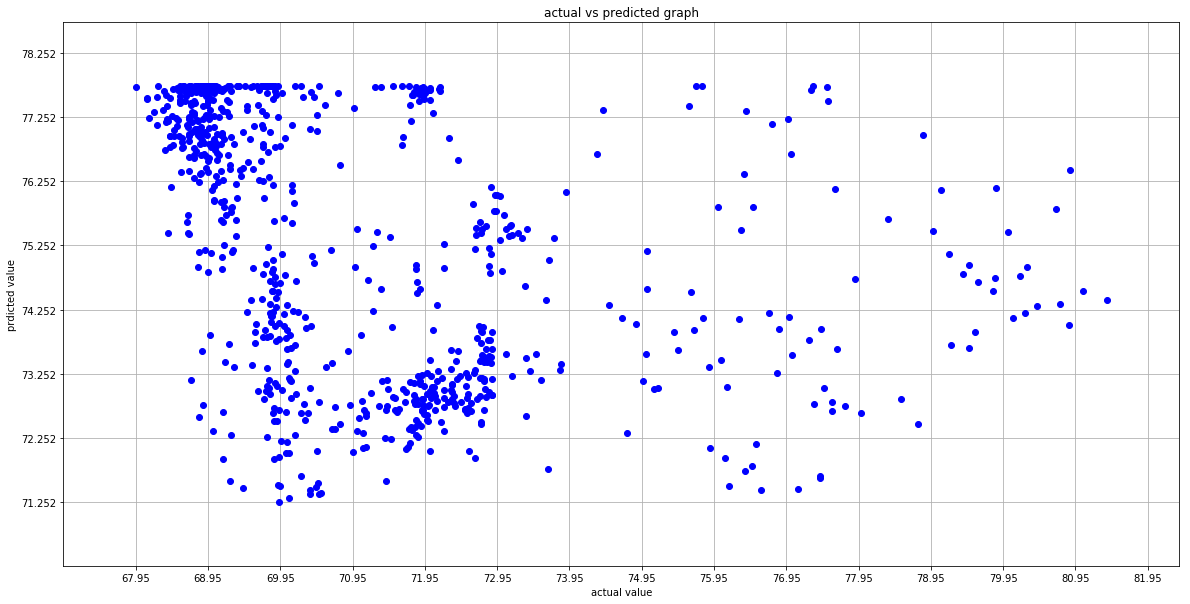

In [45]:
# this curve shows predicted output value with corresponds to test output value(actual value)
# in between the range of 0 and the length of predicted output array

low = 0
high = len(predicted_output)

print('min :', min(test_output[low:high]),' and max: ',max(test_output[low:high]))
print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
plt.plot(test_output[low:high], predicted_output[low:high], 'bo')

plt.xticks(np.arange(min(test_output[low:high]),max(test_output[low:high])+1,1))
plt.yticks(np.arange(min(predicted_output[low:high]),max(predicted_output[low:high])+1,1))

plt.xlim(min(test_output[low:high]-1), max(test_output[low:high])+1)
plt.ylim(min(predicted_output[low:high]-1), max(predicted_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')

plt.grid(b=None, which='both', axis='both')
plt.title('actual vs predicted graph')

plt.show()

min : 68.42236063923494  and max:  81.04976720775136


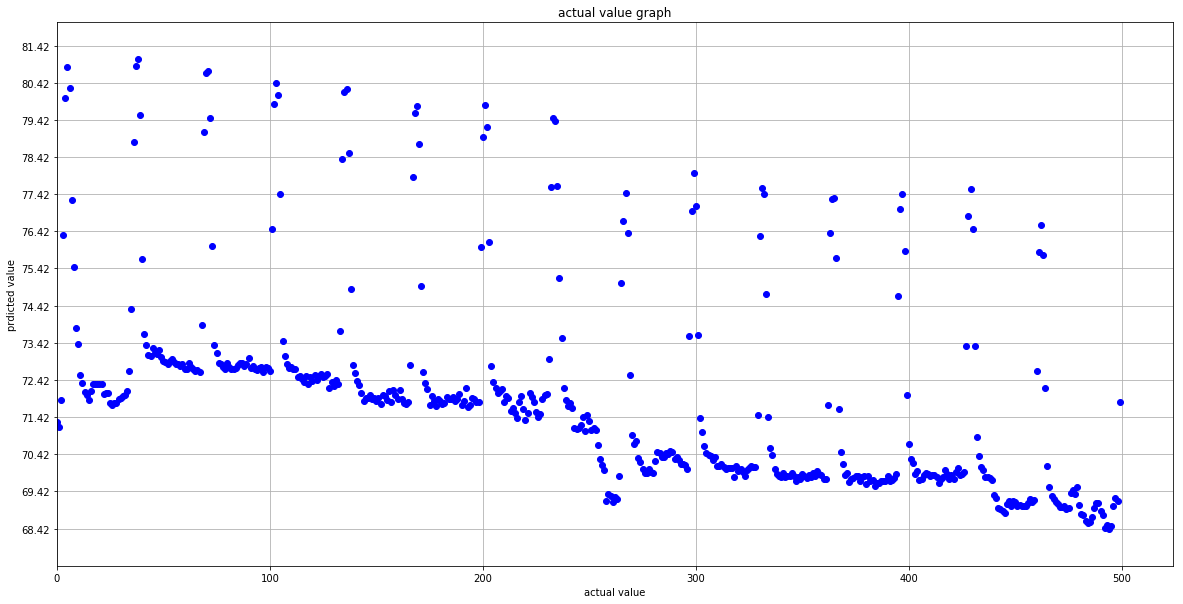

In [56]:
#this graph plots actual output in the given range(low, high)
low = 0
high = 500

print('min :', min(test_output[low:high]),' and max: ',max(test_output[low:high]))
plt.plot(test_output[low:high], 'bo')

# plt.xticks(np.arange(100, 500+1,1))
plt.yticks(np.arange(min(test_output[low:high]),max(test_output[low:high])+1,1))

plt.xlim(min(low, high,5))
plt.ylim(min(test_output[low:high]-1), max(test_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')

plt.grid(b=None, which='both', axis='both')
plt.title('actual value graph')

plt.show()

min : 71.2518451300356  and max:  77.73747106553314


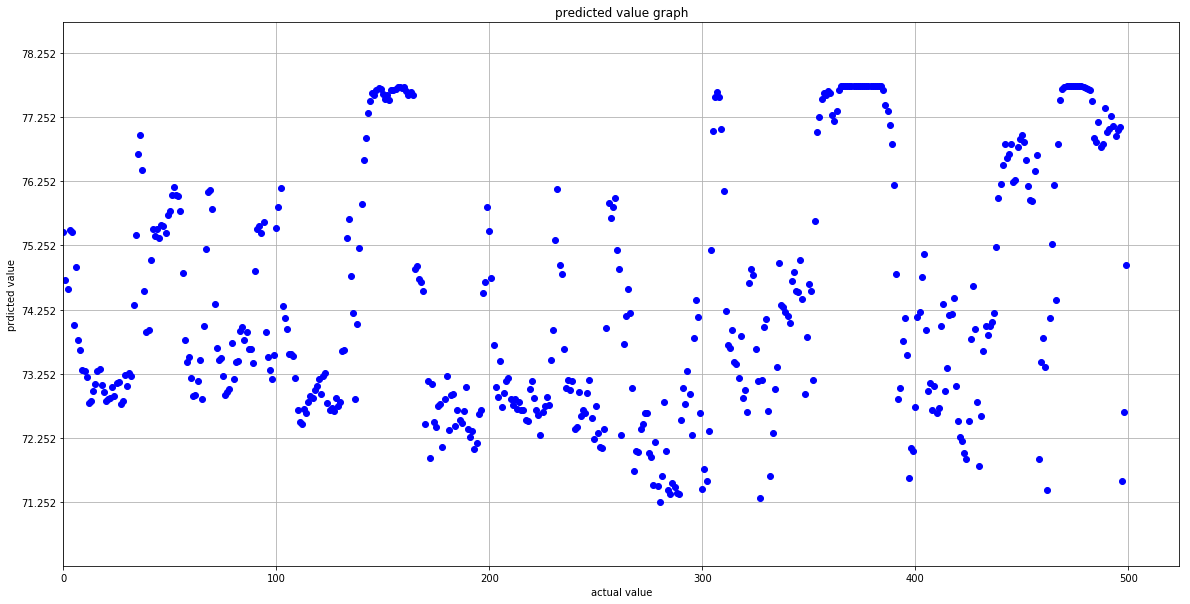

In [57]:
low = 0
high = 500

print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
plt.plot(predicted_output[low:high], 'bo')
# plt.xticks(np.arange(low, high+1,1))
plt.yticks(np.arange(min(predicted_output[low:high]),max(predicted_output[low:high])+1,1))

plt.xlim(min(low, high,5))
plt.ylim(min(predicted_output[low:high]-1), max(predicted_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')

plt.grid(b=None, which='both', axis='both')
plt.title('predicted value graph')

plt.show()

min of predicted_output:  71.2518451300356  ,max of predicted_output:  77.73747109704763
min of test_output:  67.94608028186737  ,max of test_output:  81.38228262237322


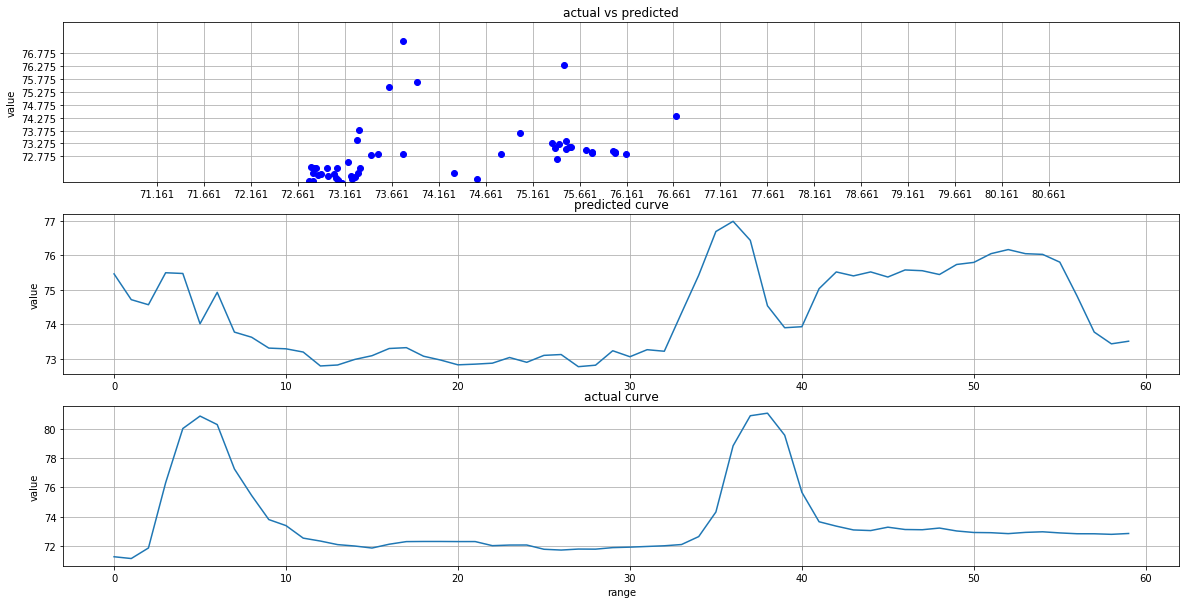

In [63]:
# graph predicted vs actual value

low = 0
high = 60

print('min of predicted_output: ', min(predicted_output),' ,max of predicted_output: ', max(predicted_output))
print('min of test_output: ', min(test_output),' ,max of test_output: ', max(test_output))

plt.subplot(3,1,1)
plt.plot(predicted_output[low:high], test_output[low:high], 'bo')
plt.ylabel('value')

plt.xticks(np.arange(min(test_output[low:high]),max(test_output[low:high]),0.5))
plt.yticks(np.arange(min(predicted_output[low:high]),max(predicted_output[low:high]),0.5))

plt.xlim(min(test_output[low:high]-1), max(test_output[low:high])+1,0.5)
plt.ylim(min(predicted_output[low:high]-1), max(predicted_output[low:high])+1,0.5)


plt.grid(b=None, which='both', axis='both')
plt.title('actual vs predicted')
# plt.xlim(min(test_output), max(test_output))
# plt.ylim(min(predicted_output), max(predicted_output))
# plt.tick_params(labelsize=10)

plt.subplot(3,1,2)
plt.plot(predicted_output[low:high])
plt.ylabel('value')
plt.grid(b=None, which='both', axis='both')
plt.title('predicted curve')
# plt.tick_params(labelsize=10)

plt.subplot(3,1,3)
plt.plot(test_output[low:high])
plt.ylabel('value')
plt.xlabel('range')
plt.grid(b=None, which='both', axis='both')
plt.title('actual curve')
# plt.tick_params(labelsize=10)

# plt.savefig('predicted_vs_actual_curve.png')
plt.show()

In [ ]:
clf_SVR = svm.SVR()
print('Default Parameters currently in use:\n')
print(clf_SVR.get_params())

In [ ]:
C = [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [2, 3, 4, 5]
gamma = [0.0001, 0.001, 0.01, 0.1, 1]

In [ ]:
param_SVR = {'C':C, 'kernel':kernel, 'degree':degree, 'gamma':gamma}

In [ ]:
no_iter = 10
no_cv = 2
no_verbose = 1
no_process = -1

In [ ]:
MODEL_SVR = RandomizedSearchCV(estimator = clf_SVR, param_distributions = param_SVR, n_iter=no_iter, cv=no_cv, verbose=no_verbose, random_state=42, n_jobs=no_process)

# Fit the random search model
# start_training_SVM = time.time()
MODEL_SVR.fit(train_input,train_output)
# end_training_SVM = time.time()